In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cowdata = pd.read_csv("./data/LR_51663_03012018.csv", decimal=",", sep=";", encoding="latin1")
dataFiles = ["LR_51663_03012018.xls", 
             "LR_51663_06022018.xlsx",
             "LR_51663_06032017.xlsx",
             "LR_51663_19012018.xls",
             "LR_51663_20022018.xlsx",
             "LR_51663_20032018.xls"
            ]        
cowdata = None
iteration = 1
for file in dataFiles:
    path = "./data/" + file
    newData = pd.read_excel(path, decimal=",", sep=";", index_col=None, na_values=["NA"], encoding="latin1")
    newData = newData.iloc[3:,1:] #Remove empty rows and columns
    newData = newData.dropna()
    if iteration == 1:
        columnNamesFi = newData.iloc[0,:]
        newData = newData.iloc[1:,:] #remove header row
        cowdata = newData
    else:        
        cowdata = cowdata.append(newData.iloc[1:,:])    
    iteration+=1

columnNamesEn = ["CowNumber","CowName","ProdPeriod","DaysInMilk","MilkQuantity","MilkQntyDeviation","AvgMilkQnty","Milkings","PassAvg","KgConcentratedFoodPerKgMilk","FeedTotal","TodaysTotal","LeftoverTotal","Fat%","Protein%","FatToProteinRatio","MasticatingMinutes","AvgWeight","Cells"]
cowdata.columns = columnNamesEn
for col in range(2, len(cowdata.columns)):
    cowdata.iloc[:,col] = pd.to_numeric(cowdata.iloc[:,col])
cowdata.to_csv("CowDataCombined.csv")
cowdata.describe()

,ProdPeriod,DaysInMilk,MilkQuantity,MilkQntyDeviation,AvgMilkQnty,Milkings,PassAvg,KgConcentratedFoodPerKgMilk,FeedTotal,TodaysTotal,LeftoverTotal,Fat%,Protein%,FatToProteinRatio,MasticatingMinutes,AvgWeight,Cells
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,2.395276,147.222047,40.527717,-0.092441,40.620157,3.122677,1.641260,15.774220,6.310882,6.561181,0.242157,4.712047,3.555339,1.321795,482.371654,593.669291,172.749606
std,1.344334,91.866860,9.203801,2.084789,8.706515,0.671800,2.344986,3.563451,1.564129,1.288330,0.329549,0.767451,0.291995,0.157241,43.501555,50.729824,207.037277
min,1.000000,5.000000,13.100000,-14.300000,16.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.640000,2.760000,0.410000,290.000000,471.000000,1.000000
25%,1.000000,72.000000,34.700000,-1.000000,34.650000,2.700000,0.300000,13.830000,5.470000,5.700000,0.100000,4.170000,3.350000,1.220000,459.000000,559.000000,31.000000
50%,2.000000,136.000000,40.000000,-0.100000,39.900000,3.100000,0.900000,15.600000,6.240000,6.940000,0.140000,4.710000,3.560000,1.320000,484.000000,585.000000,111.000000
75%,3.000000,214.000000,46.700000,0.900000,46.750000,3.600000,2.000000,17.550000,7.370000,7.535000,0.200000,5.195000,3.760000,1.430000,512.000000,624.500000,229.500000
max,8.000000,404.000000,70.000000,9.100000,68.700000,5.000000,16.600000,35.480000,10.470000,8.200000,2.470000,7.610000,4.800000,1.820000,604.000000,760.000000,2146.000000


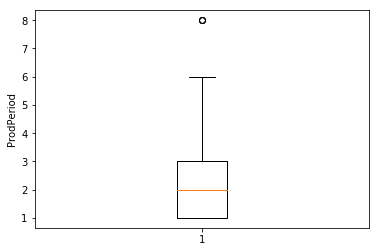

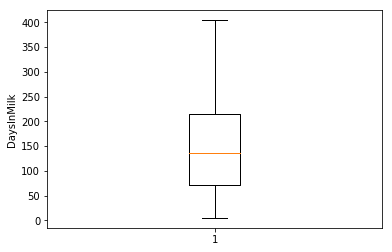

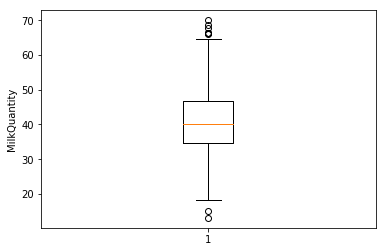

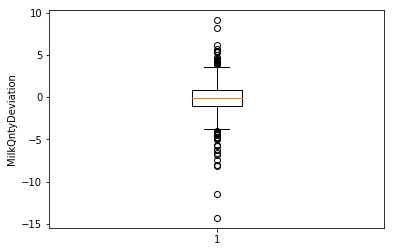

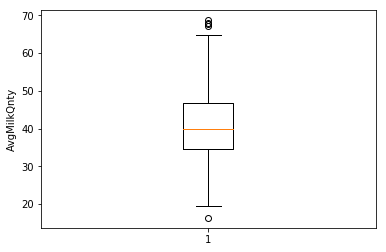

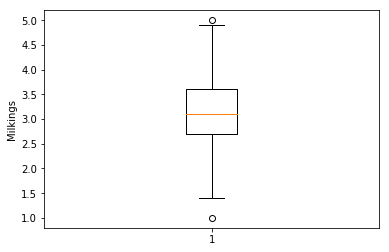

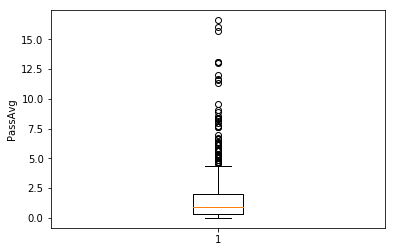

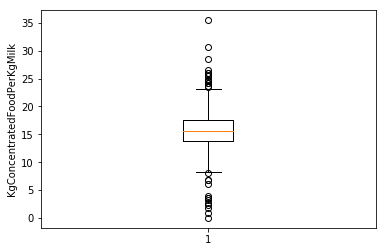

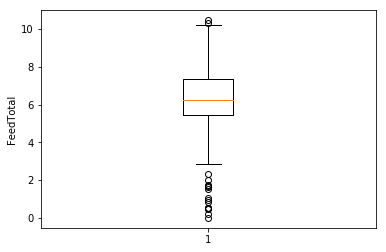

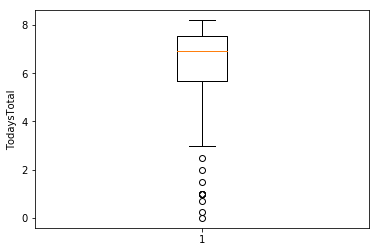

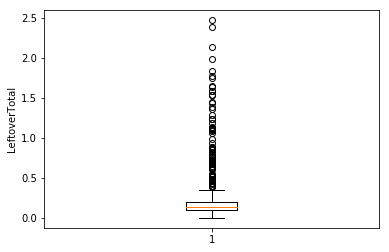

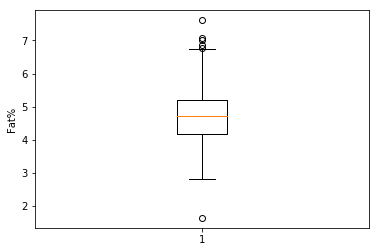

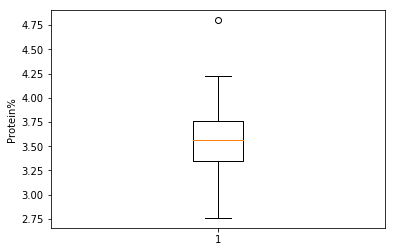

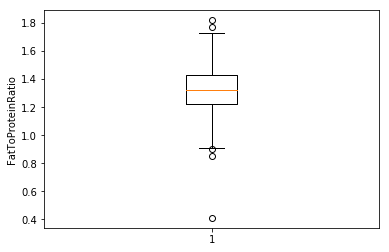

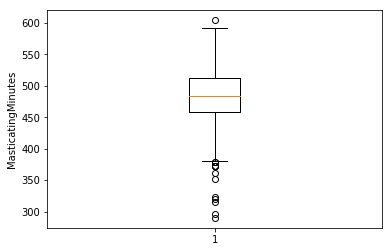

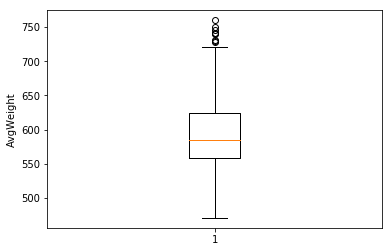

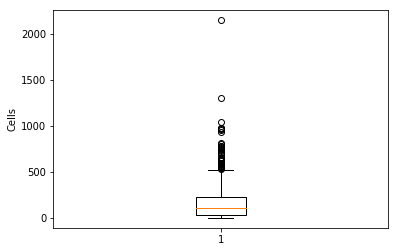

In [2]:
for k in range(2,len(cowdata.columns)):
    plt.figure(k)
    plt.boxplot(cowdata.iloc[:,k])
    plt.ylabel(columnNamesEn[k])
plt.show()

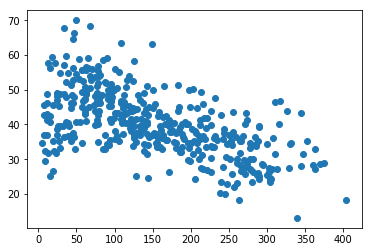

In [37]:
plt.figure()
plt.scatter(cowdata.loc[:,"DaysInMilk"], cowdata.loc[:,"MilkQuantity"])

plt.show()

In [47]:
MilkSolids = cowdata.loc[:,"MilkQuantity"] * ( cowdata.loc[:,"Fat%"] + cowdata.loc[:,"Protein%"] ) / 100

In [48]:
MilkSolids.describe()

count    421.000000
mean       3.279204
std        0.645371
min        1.545800
25%        2.821210
50%        3.241420
75%        3.680320
max        5.367840
dtype: float64

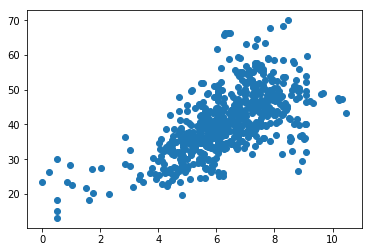

In [3]:
plt.figure()
plt.scatter(cowdata.loc[:,"FeedTotal"], cowdata.loc[:,"MilkQuantity"])
plt.show()

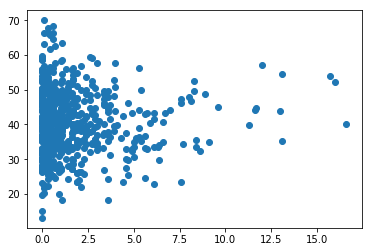

In [4]:
plt.figure()
plt.scatter(cowdata.loc[:,"PassAvg"], cowdata.loc[:,"MilkQuantity"])
plt.show()